In [461]:
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
from statsmodels.formula.api import ols      # For n-way ANOVA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split



import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline 

import sweetviz as sv # for sweet viz eda

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix ,classification_report
from sklearn import metrics


# Problem 1 

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Data Ingestion: 12 marks
1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)
2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 5 marks
1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

Modelling: 26 marks
1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)
2. Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)
3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)
4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


##  Data Ingestion 


## 1.1 Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it.

In [462]:
DF = pd.read_csv('ed.csv')

In [463]:
DF.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [464]:
DF.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [465]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [466]:
DF.drop('Unnamed: 0', axis=1, inplace=True)

In [467]:
DF.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [468]:
print("Number of Duplicates ",DF.duplicated().sum())

Number of Duplicates  8


In [469]:
DF.drop_duplicates(keep='first',inplace=True) 

In [470]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [471]:
(DF == 0).all()

vote                       False
age                        False
economic.cond.national     False
economic.cond.household    False
Blair                      False
Hague                      False
Europe                     False
political.knowledge        False
gender                     False
dtype: bool

In [472]:
DF.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [473]:
for column in DF.columns:
    if DF[column].dtype == 'object':
        print(column.upper(),': ',DF[column].nunique())
        print(DF[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




## 1.2 Perform EDA - Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

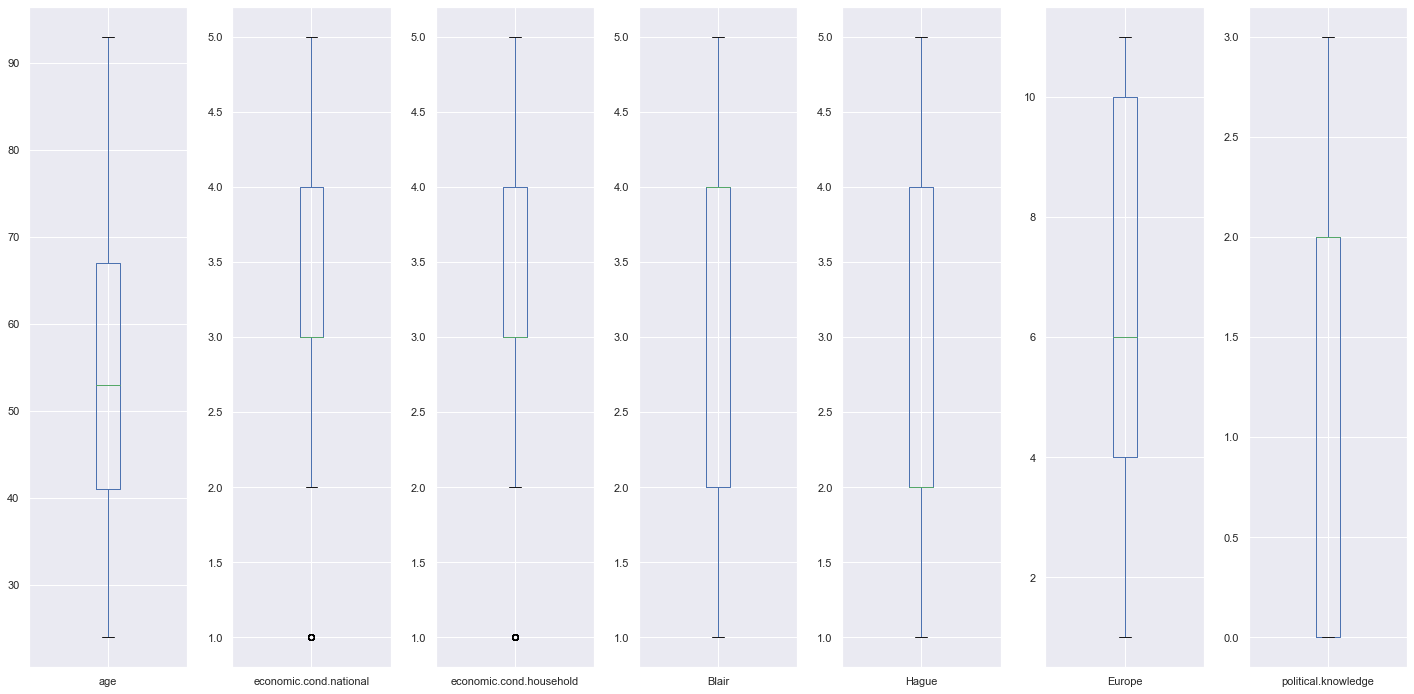

In [474]:

DF.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [475]:
from scipy import stats

numeric_cols = DF.select_dtypes(include=[np.number]).columns
numeric_cols=numeric_cols.delete(-1) #Removed the target column price 


z=np.abs(stats.zscore(DF[numeric_cols]))

listin= np.where(z>3)


outlier = list((int(j) for i in listin for j in i)) 
print("the number of outliers are ", len(outlier) )


the number of outliers are  0


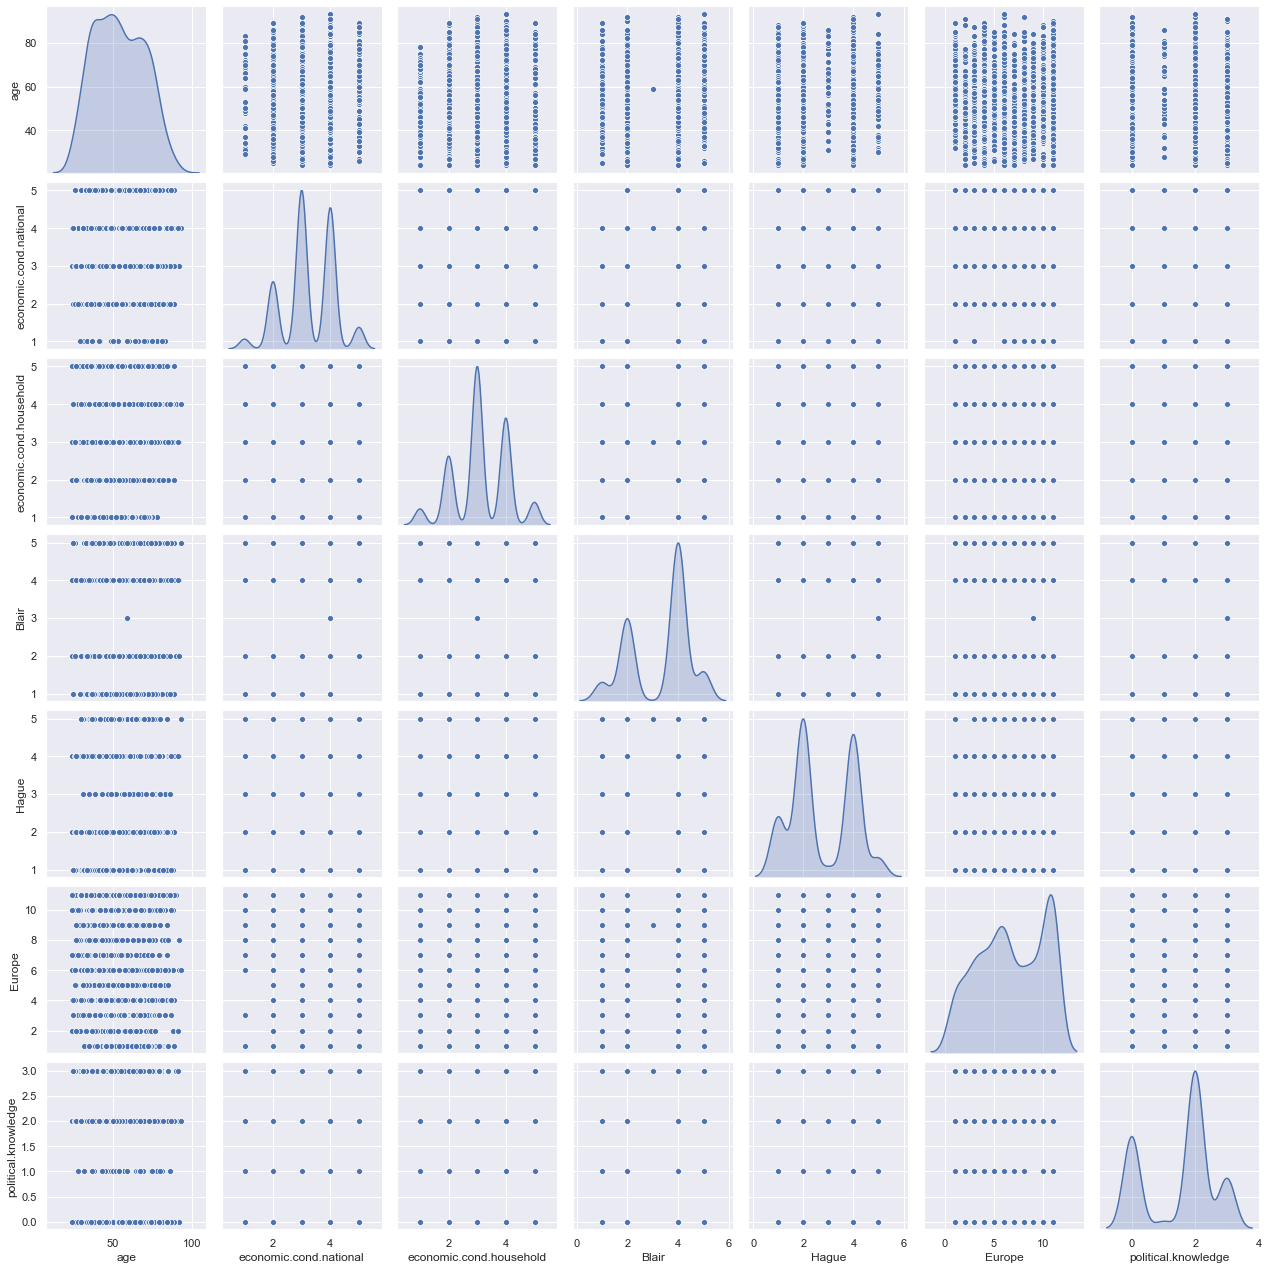

In [476]:
sns.pairplot(DF, diag_kind='kde')

In [477]:
election= sv.analyze(DF)

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [478]:
electionreport=election.show_html('election.html')
electionreport

Report election.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [479]:
party=sv.compare_intra(DF, DF["vote"] == 'Labour', ["Labour", "Conservative"] )

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [480]:
feature_config = sv.FeatureConfig(skip="vote")

In [481]:
partyreport=party.show_html('party.html',feature_config )
partyreport

Report party.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Data Preparation

## 1.3  Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test


In [482]:
from sklearn.impute import SimpleImputer

In [483]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 158.5+ KB


In [484]:
#NO ZERO DATA .

In [485]:
#yes scaling not required .

In [486]:
DF.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [487]:
#df[['carat','depth','table','x','y','z','price']] =df[['carat','depth','table','x','y','z','price']].astype('float64') 

In [488]:
encodercut= ce.OrdinalEncoder(cols=['gender'],return_df=True,
                           mapping=[{'col':'gender','mapping':{'male':1,'female':2,}}])  

df= encodercut.fit_transform(DF)
df.head()

D:\anocondal\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,2
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,2
4,Labour,41,2,2,1,1,6,2,1


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   int32 
dtypes: int32(1), int64(7), object(1)
memory usage: 152.6+ KB


In [490]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517.0,1.532630,0.499099,1.0,1.0,2.0,2.0,2.0


In [491]:
X = np.asmatrix(df[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender']])
Y = np.asarray(df['vote'])
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)


numpy.matrix

##  Modelling

## 1.4  Apply Logistic Regression and LDA (linear discriminant analysis)

In [492]:
#logistic regression 

lgmodel = LogisticRegression(solver='liblinear')
lgmodel=lgmodel.fit(X_train, y_train)
lgmodel

LogisticRegression(solver='liblinear')

In [493]:
train_pred_lg=lgmodel.predict(X_train)
test_pred_lg =lgmodel.predict(X_test)


In [494]:
modeldf=df.copy()
modeldf['predict_log_class']=lgmodel.predict(X)


In [495]:

lgmodel.score(X_test, y_test)

0.8289473684210527

Feature: 0,Score :-0.01230
Feature: 1,Score :0.67157
Feature: 2,Score :0.09575
Feature: 3,Score :0.62326
Feature: 4,Score :-0.79487
Feature: 5,Score :-0.20179
Feature: 6,Score :-0.29544
Feature: 7,Score :-0.10248


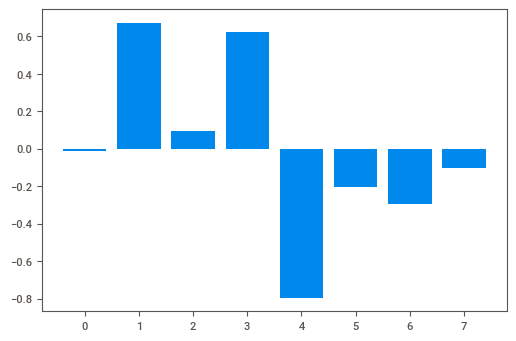

In [496]:
lgmodelimportant=lgmodel.coef_[0]
lgmodelimportant

for i,v in enumerate(lgmodelimportant):
    print('Feature: %0d,Score :%.5f'%(i,v))

plt.bar([x for x in range (len(lgmodelimportant))],lgmodelimportant)
plt.show()

In [497]:
#lDA
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X_train, y_train)
ldamodel

LinearDiscriminantAnalysis()

In [498]:
train_pred_lda=ldamodel.predict(X_train)
test_pred_lda =ldamodel.predict(X_test)

In [499]:
modeldf['predict_LDA_class']=ldamodel.predict(X)


In [500]:
ldamodel.score(X_test, y_test)

0.8333333333333334

Feature: 0,Score :-0.02004
Feature: 1,Score :0.60492
Feature: 2,Score :0.05007
Feature: 3,Score :0.74240
Feature: 4,Score :-0.92663
Feature: 5,Score :-0.22361
Feature: 6,Score :-0.43033
Feature: 7,Score :-0.14908


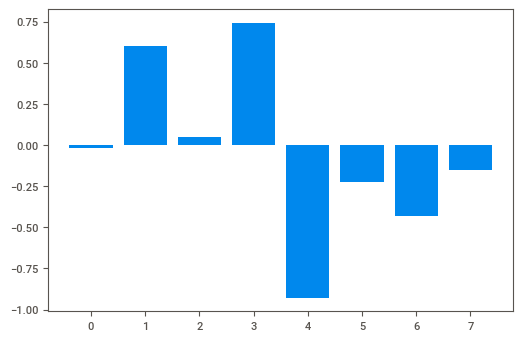

In [501]:
ldamodelimportant=ldamodel.coef_[0]
ldamodelimportant

for i,v in enumerate(ldamodelimportant):
    print('Feature: %0d,Score :%.5f'%(i,v))

plt.bar([x for x in range (len(ldamodelimportant))],ldamodelimportant)
plt.show()

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results

In [502]:
# knn
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knnmodel =knn.fit(X_train, y_train)
knnmodel

KNeighborsClassifier(weights='distance')

In [503]:
train_pred_knn=knnmodel.predict(X_train)
test_pred_knn =knnmodel.predict(X_test)

In [504]:
modeldf['predict_knn_class']=knnmodel.predict(X)

In [505]:
knnmodel.score(X_test, y_test)

0.8157894736842105

In [506]:
# Naive Byes
naivebyes_model = GaussianNB()

nbmodel=naivebyes_model.fit(X_train, y_train)
nbmodel

GaussianNB()

In [507]:
train_pred_nb=nbmodel.predict(X_train)
test_pred_nb =nbmodel.predict(X_test)

In [508]:
modeldf['predict_nb_class']=nbmodel.predict(X)

In [509]:
nbmodel.score(X_test, y_test)

0.8223684210526315

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting.

In [510]:
# random forest 
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [511]:
# bagging with random forest classfier
bgcl = BaggingClassifier(base_estimator=rfcl, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

bgcl


BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50,
                                                        random_state=1),
                  n_estimators=50, random_state=1)

In [512]:
train_pred_bgcl=bgcl.predict(X_train)
test_pred_bgcl =bgcl.predict(X_test)

In [513]:
modeldf['predict_bgcl_class']=bgcl.predict(X)

In [514]:
bgcl.score(X_test, y_test)

0.8289473684210527

Feature: 0,Score :0.20270
Feature: 1,Score :0.09975
Feature: 2,Score :0.08011
Feature: 3,Score :0.13939
Feature: 4,Score :0.17587
Feature: 5,Score :0.19250
Feature: 6,Score :0.07489
Feature: 7,Score :0.03479


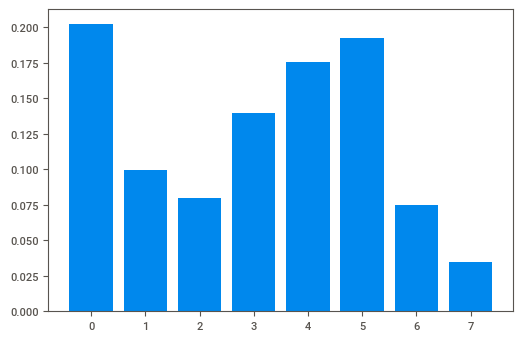

In [515]:
bgclmodelimportant= np.mean([tree.feature_importances_ for tree in bgcl.estimators_], axis=0)
bgclmodelimportant

for i,v in enumerate(bgclmodelimportant):
    print('Feature: %0d,Score :%.5f'%(i,v))

plt.bar([x for x in range (len(bgclmodelimportant))],bgclmodelimportant)
plt.show()

In [516]:
# Boosting = Ada Boosting 
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)
abcl

AdaBoostClassifier(n_estimators=10, random_state=1)

In [517]:
train_pred_abcl=abcl.predict(X_train)
test_pred_abcl =abcl.predict(X_test)

In [518]:
modeldf['predict_abcl_class']=abcl.predict(X)

In [519]:
abcl.score(X_test, y_test)

0.8201754385964912

Feature: 0,Score :0.10000
Feature: 1,Score :0.20000
Feature: 2,Score :0.00000
Feature: 3,Score :0.20000
Feature: 4,Score :0.20000
Feature: 5,Score :0.20000
Feature: 6,Score :0.10000
Feature: 7,Score :0.00000


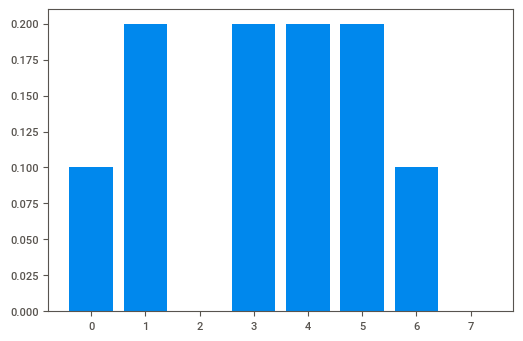

In [520]:
abclimportant=abcl.feature_importances_

for i,v in enumerate(abclimportant):
    print('Feature: %0d,Score :%.5f'%(i,v))
plt.bar([x for x in range(len(abclimportant))],abclimportant)
plt.show()

In [521]:
# Boosting = Gradient Boosting 
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
gbcl

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [522]:
train_pred_gbcl=gbcl.predict(X_train)
test_pred_gbcl =gbcl.predict(X_test)

In [523]:
modeldf['predict_gbcl_class']=gbcl.predict(X)

In [524]:
gbcl.score(X_test, y_test)

0.8289473684210527

Feature: 0,Score :0.07292
Feature: 1,Score :0.07714
Feature: 2,Score :0.02613
Feature: 3,Score :0.19418
Feature: 4,Score :0.36841
Feature: 5,Score :0.17084
Feature: 6,Score :0.08899
Feature: 7,Score :0.00139


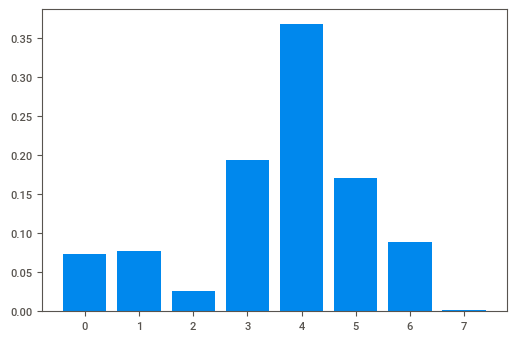

In [525]:
gbclimportant=gbcl.feature_importances_
for i,v in enumerate(gbclimportant):
    print('Feature: %0d,Score :%.5f'%(i,v))
plt.bar([x for x in range(len(gbclimportant))],gbclimportant)
plt.show()

## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (4 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized

### logistic regression 

In [526]:
print("Accuracy score  for Logistic regression  train variables ")
lgmodel_train_score = lgmodel.score(X_train, y_train)
print (lgmodel_train_score)

Accuracy score  for Logistic regression  train variables 
0.8350612629594723


In [527]:
print("Accuracy score for Logistic regression test variables ")
lgmodel_test_score = lgmodel.score(X_test, y_test)
lgmodel_test_score

Accuracy score for Logistic regression test variables 


0.8289473684210527

 confusion matrix Train variables for logistic regression 


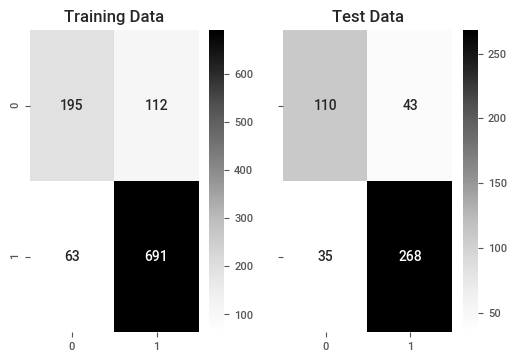

In [528]:
print(" confusion matrix Train variables for logistic regression ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(metrics.confusion_matrix(y_train, train_pred_lg),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(metrics.confusion_matrix(y_test, test_pred_lg),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');




In [529]:
print("Logistic regression Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_lg),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_lg),'\n')

Logistic regression Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

Conservative       0.76      0.64      0.69       307
      Labour       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

Conservative       0.76      0.72      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC and ROC FOR Logistic regression
AUC for the Training Data: 0.890
AUC for the Test Data: 0.880


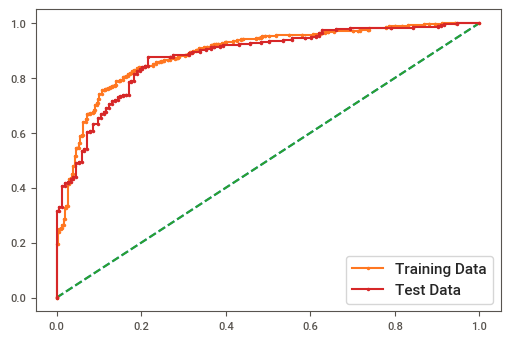

In [530]:
print("AUC and ROC FOR Logistic regression")
lg_pred_prob_train = lgmodel.predict_proba(X_train)


lg_pred_prob_test = lgmodel.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
lg_train_auc = metrics.roc_auc_score(y_train,lg_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lg_train_auc)

#  calculate roc curve
lg_train_fpr, lg_train_tpr, thresholds = metrics.roc_curve(y_train,lg_pred_prob_train[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_train_fpr, lg_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lg_test_auc = metrics.roc_auc_score(y_test,lg_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lg_test_auc)

#  calculate roc curve
lg_test_fpr,lg_test_tpr, thresholds = metrics.roc_curve(y_test,lg_pred_prob_test[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_test_fpr, lg_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()



### LDA

In [532]:
print("Accuracy score  for LDA  train variables ")
ldamodel_train_score = ldamodel.score(X_train, y_train)
print (ldamodel_train_score)

Accuracy score  for LDA  train variables 
0.8341187558906692


In [533]:
print("Accuracy score for LDA test variables ")
ldamodel_test_score = ldamodel.score(X_test, y_test)
ldamodel_test_score

Accuracy score for LDA test variables 


0.8333333333333334

 confusion matrix Train variables for LDA 


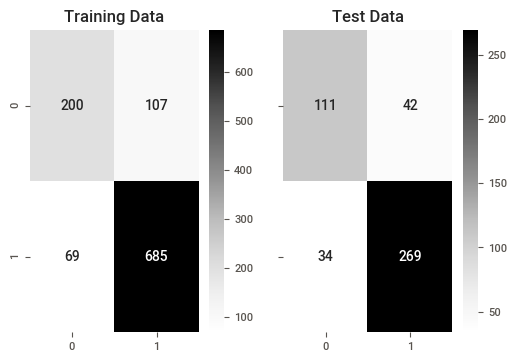

In [534]:
print(" confusion matrix Train variables for LDA ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');




In [535]:
print("LDA Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_lda),'\n')

LDA Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

Conservative       0.77      0.73      0.74       153
      Labour       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC and ROC FOR LDA
AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


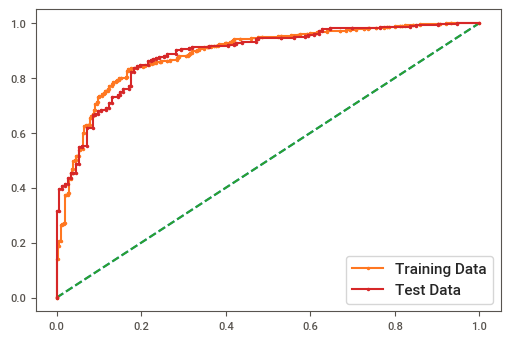

In [536]:
print("AUC and ROC FOR LDA")
lda_pred_prob_train = ldamodel.predict_proba(X_train)


lda_pred_prob_test = ldamodel.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,lda_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,lda_pred_prob_train[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,lda_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,lda_pred_prob_test[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()



### KNN Model 

In [537]:
print("Accuracy score  for KNN  train variables ")
knnmodel_train_score = knnmodel.score(X_train, y_train)
print (knnmodel_train_score)

Accuracy score  for KNN  train variables 
1.0


In [538]:
print("Accuracy score for KNN test variables ")
knnmodel_test_score = knnmodel.score(X_test, y_test)
knnmodel_test_score

Accuracy score for KNN test variables 


0.8157894736842105

 confusion matrix Train variables for KNN 


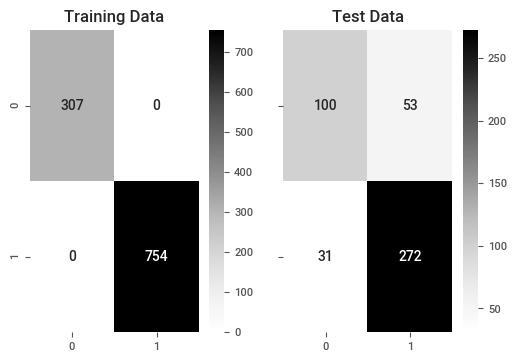

In [539]:
print(" confusion matrix Train variables for KNN ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_knn)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_knn)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');




In [540]:
print("KNN Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_knn),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_knn),'\n')

KNN Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

Conservative       1.00      1.00      1.00       307
      Labour       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

Conservative       0.76      0.65      0.70       153
      Labour       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.81      0.82      0.81       456
 



AUC and ROC FOR knn
AUC for the Training Data: 1.000
AUC for the Test Data: 0.858


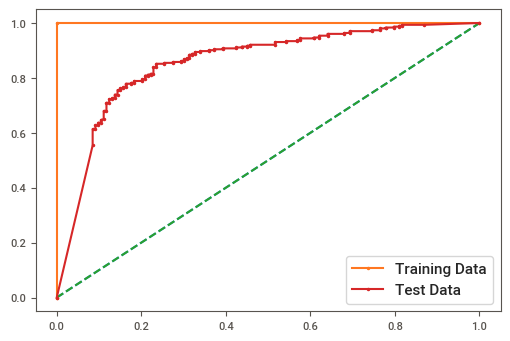

In [541]:
print("AUC and ROC FOR knn")
knn_pred_prob_train = knnmodel.predict_proba(X_train)


knn_pred_prob_test = knnmodel.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
knn_train_auc = metrics.roc_auc_score(y_train,knn_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % knn_train_auc)

#  calculate roc curve
knn_train_fpr, knn_train_tpr, thresholds = metrics.roc_curve(y_train,knn_pred_prob_train[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
knn_test_auc = metrics.roc_auc_score(y_test,knn_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % knn_test_auc)

#  calculate roc curve
knn_test_fpr, knn_test_tpr, thresholds = metrics.roc_curve(y_test,knn_pred_prob_test[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()



### Naive Bayes

In [542]:
print("Accuracy score  for Naive Bayes train variables ")
nbmodel_train_score = nbmodel.score(X_train, y_train)
print (nbmodel_train_score)

Accuracy score  for Naive Bayes train variables 
0.8350612629594723


In [543]:
print("Accuracy score for  Naive Bayes test variables ")
nbmodel_test_score = nbmodel.score(X_test, y_test)
nbmodel_test_score

Accuracy score for  Naive Bayes test variables 


0.8223684210526315

 confusion matrix Train variables for  Naive Bayes 


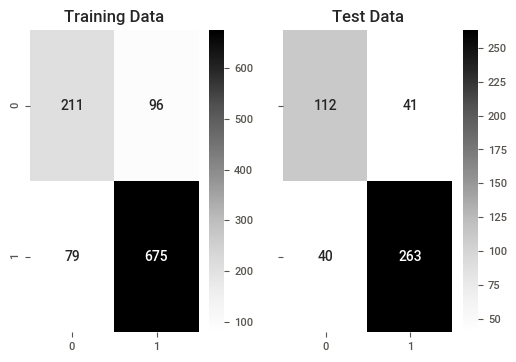

In [544]:
print(" confusion matrix Train variables for  Naive Bayes ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_nb)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_nb)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');




In [545]:
print(" Naive Bayes Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_nb),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_nb),'\n')

 Naive Bayes Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC and ROC FOR  Naive Bayes 
AUC for the Training Data: 0.888
AUC for the Test Data: 0.876


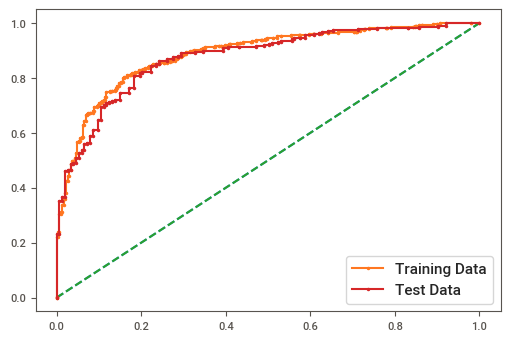

In [546]:
print("AUC and ROC FOR  Naive Bayes ")
nb_pred_prob_train = nbmodel.predict_proba(X_train)


nb_pred_prob_test = nbmodel.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
nb_train_auc = metrics.roc_auc_score(y_train,nb_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % nb_train_auc)

#  calculate roc curve
nb_train_fpr, nb_train_tpr, thresholds = metrics.roc_curve(y_train,nb_pred_prob_train[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
nb_test_auc = metrics.roc_auc_score(y_test,nb_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % nb_test_auc)

#  calculate roc curve
nb_test_fpr, nb_test_tpr, thresholds = metrics.roc_curve(y_test,nb_pred_prob_test[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()



### Bagging (random forest )

In [547]:
print("Accuracy score  for Bagging train variables ")
bgcl_train_score = bgcl.score(X_train, y_train)
print (bgcl_train_score)

Accuracy score  for Bagging train variables 
0.9660697455230914


In [548]:
print("Accuracy score for Bagging test variables ")
bgcl_test_score = bgcl.score(X_test, y_test)
bgcl_test_score

Accuracy score for Bagging test variables 


0.8289473684210527

 confusion matrix Train variables for   Bagging 


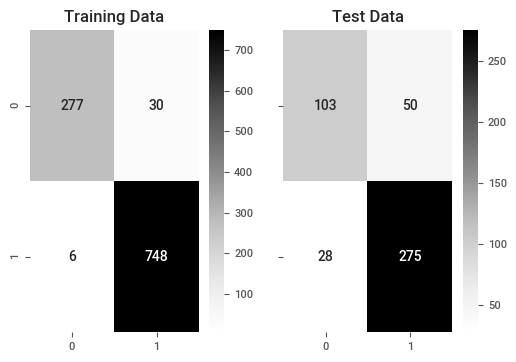

In [549]:
print(" confusion matrix Train variables for   Bagging ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_bgcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_bgcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');




In [550]:
print("  Classfication report  for   Bagging ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_bgcl),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_bgcl),'\n')

  Classfication report  for   Bagging 
Classification Report of the training data:

               precision    recall  f1-score   support

Conservative       0.98      0.90      0.94       307
      Labour       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

Conservative       0.79      0.67      0.73       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC and ROC FOR   Bagging 
AUC for the Training Data: 0.997
AUC for the Test Data: 0.896


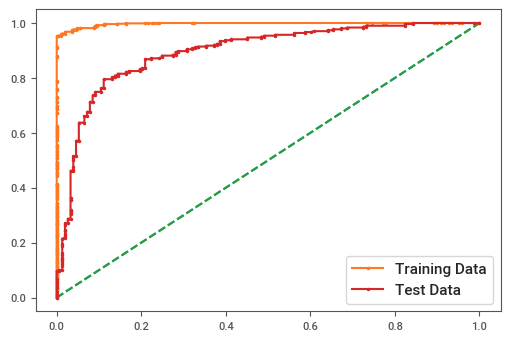

In [551]:
print("AUC and ROC FOR   Bagging ")
bgcl_pred_prob_train = bgcl.predict_proba(X_train)


bgcl_pred_prob_test = bgcl.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
bgcl_train_auc = metrics.roc_auc_score(y_train,bgcl_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % bgcl_train_auc)

#  calculate roc curve
bgcl_train_fpr, bgcl_train_tpr, thresholds = metrics.roc_curve(y_train,bgcl_pred_prob_train[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bgcl_train_fpr, bgcl_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
bgcl_test_auc = metrics.roc_auc_score(y_test,bgcl_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % bgcl_test_auc)

#  calculate roc curve
bgcl_test_fpr, bgcl_test_tpr, thresholds = metrics.roc_curve(y_test,bgcl_pred_prob_test[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bgcl_test_fpr, bgcl_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()



###  Ada Boosting 

In [552]:
print("Accuracy score  for Ada Boosting train variables ")
abcl_train_score = abcl.score(X_train, y_train)
print (abcl_train_score)

Accuracy score  for Ada Boosting train variables 
0.8426013195098964


In [553]:
print("Accuracy score forAda Boosting test variables ")
abcl_test_score = abcl.score(X_test, y_test)
abcl_test_score

Accuracy score forAda Boosting test variables 


0.8201754385964912

 confusion matrix Train variables for Ada Boosting


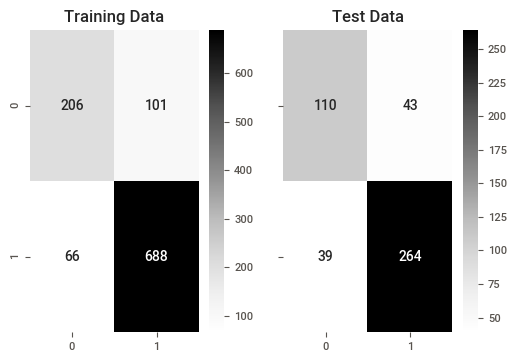

In [554]:
print(" confusion matrix Train variables for Ada Boosting")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_abcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_abcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');




In [555]:
print("  Classfication report  for   Ada Boosting ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_abcl),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_abcl),'\n')

  Classfication report  for   Ada Boosting 
Classification Report of the training data:

               precision    recall  f1-score   support

Conservative       0.76      0.67      0.71       307
      Labour       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

Conservative       0.74      0.72      0.73       153
      Labour       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC and ROC FOR   Ada Boosting  
AUC for the Training Data: 0.898
AUC for the Test Data: 0.878


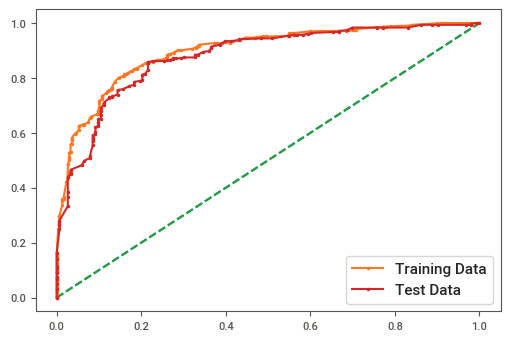

In [556]:
print("AUC and ROC FOR   Ada Boosting  ")
abcl_pred_prob_train = abcl.predict_proba(X_train)


abcl_pred_prob_test = abcl.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
abcl_train_auc = metrics.roc_auc_score(y_train,abcl_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % abcl_train_auc)

#  calculate roc curve
abcl_train_fpr, abcl_train_tpr, thresholds = metrics.roc_curve(y_train,abcl_pred_prob_train[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(abcl_train_fpr, abcl_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
abcl_test_auc = metrics.roc_auc_score(y_test,abcl_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % abcl_test_auc)

#  calculate roc curve
abcl_test_fpr, abcl_test_tpr, thresholds = metrics.roc_curve(y_test,abcl_pred_prob_test[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(abcl_test_fpr, abcl_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()



 ### Gradient Boosting 

In [557]:
print("Accuracy score  for Gradient Boosting train variables ")
gbcl_train_score = gbcl.score(X_train, y_train)
print (gbcl_train_score)

Accuracy score  for Gradient Boosting train variables 
0.8803016022620169


In [558]:
print("Accuracy score gradient Boosting test variables ")
gbcl_test_score = gbcl.score(X_test, y_test)
gbcl_test_score

Accuracy score gradient Boosting test variables 


0.8289473684210527

 confusion matrix Train variables for gradient Boosting


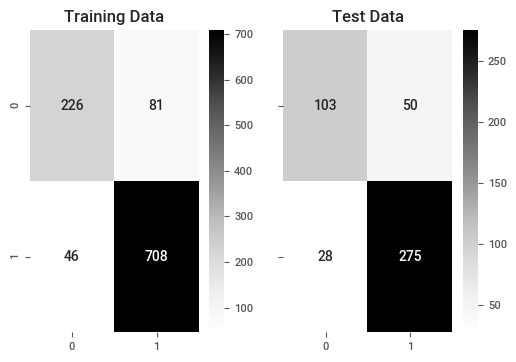

In [559]:
print(" confusion matrix Train variables for gradient Boosting")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models 

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_gbcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_gbcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');




In [560]:
print("  Classfication report  for   gradient Boosting ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_gbcl),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_gbcl),'\n')

  Classfication report  for   gradient Boosting 
Classification Report of the training data:

               precision    recall  f1-score   support

Conservative       0.83      0.74      0.78       307
      Labour       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

Conservative       0.79      0.67      0.73       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC and ROC FOR   Gradient Boosting  
AUC for the Training Data: 0.935
AUC for the Test Data: 0.897


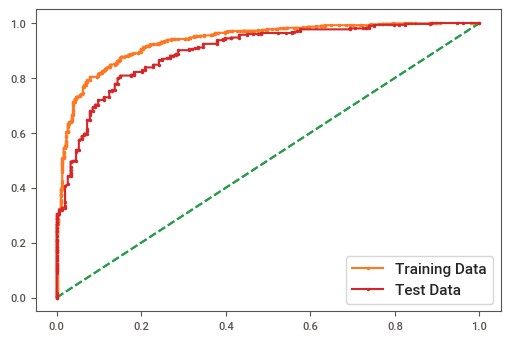

In [561]:
print("AUC and ROC FOR   Gradient Boosting  ")
gbcl_pred_prob_train = gbcl.predict_proba(X_train)


gbcl_pred_prob_test = gbcl.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
gbcl_train_auc = metrics.roc_auc_score(y_train,gbcl_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % gbcl_train_auc)

#  calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, thresholds = metrics.roc_curve(y_train,gbcl_pred_prob_train[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
gbcl_test_auc = metrics.roc_auc_score(y_test,gbcl_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % gbcl_test_auc)

#  calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, thresholds = metrics.roc_curve(y_test,gbcl_pred_prob_test[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()



In [562]:
#compare  models 


In [563]:
cmetrics=classification_report(y_train,train_pred_lg,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lg_train_f1=round(df.loc["Labour"][2],2)
lg_train_recall=round(df.loc["Labour"][1],2)
lg_train_precision=round(df.loc["Labour"][0],2)
df


,precision,recall,f1-score,support
Conservative,0.755814,0.635179,0.690265,307.000000
Labour,0.860523,0.916446,0.887604,754.000000
accuracy,0.835061,0.835061,0.835061,0.835061
macro avg,0.808168,0.775812,0.788935,1061.000000
weighted avg,0.830225,0.835061,0.830504,1061.000000


In [564]:
cmetrics=classification_report(y_test,test_pred_lg,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lg_test_f1=round(df.loc["Labour"][2],2)
lg_test_recall=round(df.loc["Labour"][1],2)
lg_test_precision=round(df.loc["Labour"][0],2)
df

,precision,recall,f1-score,support
Conservative,0.758621,0.718954,0.738255,153.000000
Labour,0.861736,0.884488,0.872964,303.000000
accuracy,0.828947,0.828947,0.828947,0.828947
macro avg,0.810179,0.801721,0.805610,456.000000
weighted avg,0.827138,0.828947,0.827766,456.000000


In [565]:
cmetrics=classification_report(y_train,train_pred_lda,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lda_train_f1=round(df.loc["Labour"][2],2)
lda_train_recall=round(df.loc["Labour"][1],2)
lda_train_precision=round(df.loc["Labour"][0],2)
df

,precision,recall,f1-score,support
Conservative,0.743494,0.651466,0.694444,307.000000
Labour,0.864899,0.908488,0.886158,754.000000
accuracy,0.834119,0.834119,0.834119,0.834119
macro avg,0.804197,0.779977,0.790301,1061.000000
weighted avg,0.829771,0.834119,0.830686,1061.000000


In [566]:
cmetrics=classification_report(y_test,test_pred_lda,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lda_test_f1=round(df.loc["Labour"][2],2)
lda_test_recall=round(df.loc["Labour"][1],2)
lda_test_precision=round(df.loc["Labour"][0],2)
df

,precision,recall,f1-score,support
Conservative,0.765517,0.725490,0.744966,153.000000
Labour,0.864952,0.887789,0.876221,303.000000
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.815235,0.806639,0.810594,456.000000
weighted avg,0.831589,0.833333,0.832182,456.000000


In [567]:
cmetrics=classification_report(y_train,train_pred_knn,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
knn_train_f1=round(df.loc["Labour"][2],2)
knn_train_recall=round(df.loc["Labour"][1],2)
knn_train_precision=round(df.loc["Labour"][0],2)
df


,precision,recall,f1-score,support
Conservative,1.0,1.0,1.0,307.0
Labour,1.0,1.0,1.0,754.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1061.0
weighted avg,1.0,1.0,1.0,1061.0


In [568]:
cmetrics=classification_report(y_test,test_pred_knn,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
knn_test_f1=round(df.loc["Labour"][2],2)
knn_test_recall=round(df.loc["Labour"][1],2)
knn_test_precision=round(df.loc["Labour"][0],2)
df

,precision,recall,f1-score,support
Conservative,0.763359,0.653595,0.704225,153.000000
Labour,0.836923,0.897690,0.866242,303.000000
accuracy,0.815789,0.815789,0.815789,0.815789
macro avg,0.800141,0.775642,0.785234,456.000000
weighted avg,0.812240,0.815789,0.811881,456.000000


In [569]:
cmetrics=classification_report(y_train,train_pred_nb,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
nb_train_f1=round(df.loc["Labour"][2],2)
nb_train_recall=round(df.loc["Labour"][1],2)
nb_train_precision=round(df.loc["Labour"][0],2)
df


,precision,recall,f1-score,support
Conservative,0.727586,0.687296,0.706868,307.000000
Labour,0.875486,0.895225,0.885246,754.000000
accuracy,0.835061,0.835061,0.835061,0.835061
macro avg,0.801536,0.791261,0.796057,1061.000000
weighted avg,0.832692,0.835061,0.833632,1061.000000


In [570]:
cmetrics=classification_report(y_test,test_pred_nb,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
nb_test_f1=round(df.loc["Labour"][2],2)
nb_test_recall=round(df.loc["Labour"][1],2)
nb_test_precision=round(df.loc["Labour"][0],2)
df

,precision,recall,f1-score,support
Conservative,0.736842,0.732026,0.734426,153.000000
Labour,0.865132,0.867987,0.866557,303.000000
accuracy,0.822368,0.822368,0.822368,0.822368
macro avg,0.800987,0.800006,0.800492,456.000000
weighted avg,0.822087,0.822368,0.822224,456.000000


In [571]:
cmetrics=classification_report(y_train,train_pred_bgcl,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
bgcl_train_f1=round(df.loc["Labour"][2],2)
bgcl_train_recall=round(df.loc["Labour"][1],2)
bgcl_train_precision=round(df.loc["Labour"][0],2)
df


,precision,recall,f1-score,support
Conservative,0.978799,0.902280,0.938983,307.00000
Labour,0.961440,0.992042,0.976501,754.00000
accuracy,0.966070,0.966070,0.966070,0.96607
macro avg,0.970119,0.947161,0.957742,1061.00000
weighted avg,0.966462,0.966070,0.965645,1061.00000


In [572]:
cmetrics=classification_report(y_test,test_pred_bgcl,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
bgcl_test_f1=round(df.loc["Labour"][2],2)
bgcl_test_recall=round(df.loc["Labour"][1],2)
bgcl_test_precision=round(df.loc["Labour"][0],2)
df

,precision,recall,f1-score,support
Conservative,0.786260,0.673203,0.725352,153.000000
Labour,0.846154,0.907591,0.875796,303.000000
accuracy,0.828947,0.828947,0.828947,0.828947
macro avg,0.816207,0.790397,0.800574,456.000000
weighted avg,0.826058,0.828947,0.825318,456.000000


In [573]:
cmetrics=classification_report(y_train,train_pred_abcl,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
abcl_train_f1=round(df.loc["Labour"][2],2)
abcl_train_recall=round(df.loc["Labour"][1],2)
abcl_train_precision=round(df.loc["Labour"][0],2)
df


,precision,recall,f1-score,support
Conservative,0.757353,0.671010,0.711572,307.000000
Labour,0.871990,0.912467,0.891769,754.000000
accuracy,0.842601,0.842601,0.842601,0.842601
macro avg,0.814671,0.791738,0.801670,1061.000000
weighted avg,0.838820,0.842601,0.839629,1061.000000


In [574]:
cmetrics=classification_report(y_test,test_pred_abcl,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
abcl_test_f1=round(df.loc["Labour"][2],2)
abcl_test_recall=round(df.loc["Labour"][1],2)
abcl_test_precision=round(df.loc["Labour"][0],2)
df

,precision,recall,f1-score,support
Conservative,0.738255,0.718954,0.728477,153.000000
Labour,0.859935,0.871287,0.865574,303.000000
accuracy,0.820175,0.820175,0.820175,0.820175
macro avg,0.799095,0.795121,0.797025,456.000000
weighted avg,0.819108,0.820175,0.819574,456.000000


In [575]:
cmetrics=classification_report(y_train,train_pred_gbcl,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
gbcl_train_f1=round(df.loc["Labour"][2],2)
gbcl_train_recall=round(df.loc["Labour"][1],2)
gbcl_train_precision=round(df.loc["Labour"][0],2)
df


,precision,recall,f1-score,support
Conservative,0.830882,0.736156,0.780656,307.000000
Labour,0.897338,0.938992,0.917693,754.000000
accuracy,0.880302,0.880302,0.880302,0.880302
macro avg,0.864110,0.837574,0.849175,1061.000000
weighted avg,0.878109,0.880302,0.878041,1061.000000


In [576]:
cmetrics=classification_report(y_test,test_pred_gbcl,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
gbcl_test_f1=round(df.loc["Labour"][2],2)
gbcl_test_recall=round(df.loc["Labour"][1],2)
gbcl_test_precision=round(df.loc["Labour"][0],2)
df

,precision,recall,f1-score,support
Conservative,0.786260,0.673203,0.725352,153.000000
Labour,0.846154,0.907591,0.875796,303.000000
accuracy,0.828947,0.828947,0.828947,0.828947
macro avg,0.816207,0.790397,0.800574,456.000000
weighted avg,0.826058,0.828947,0.825318,456.000000


### comparison of performance metrics between models

In [577]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic reg Train':[lgmodel_train_score,lg_train_auc,lg_train_recall,lg_train_precision,lg_train_f1],
        'Logistic reg Test':[lgmodel_test_score,lg_test_auc,lg_test_recall,lg_test_precision,lg_test_f1],
        'LDA Train':[ldamodel_train_score,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[ldamodel_test_score,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'KNN Train':[knnmodel_train_score,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knnmodel_test_score,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'Naive Bayes Train':[nbmodel_train_score,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'Naive Bayes Test':[nbmodel_test_score,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'Bagging Train':[bgcl_train_score,bgcl_train_auc,bgcl_train_recall,bgcl_train_precision,bgcl_train_f1],
        'Bagging Test':[bgcl_test_score,bgcl_test_auc,bgcl_test_recall,bgcl_test_precision,bgcl_test_f1],
        'Ada Boosting Train':[abcl_train_score,abcl_train_auc,abcl_train_recall,abcl_train_precision,abcl_train_f1],
        'Ada Boosting Test':[abcl_test_score,abcl_test_auc,abcl_test_recall,abcl_test_precision,abcl_test_f1],
        'Gradient Boosting Train':[gbcl_train_score,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
        'Gradient Boosting Test':[gbcl_test_score,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1], },index=index)
        
        
round(data,2)

,Logistic reg Train,Logistic reg Test,LDA Train,LDA Test,KNN Train,KNN Test,Naive Bayes Train,Naive Bayes Test,Bagging Train,Bagging Test,Ada Boosting Train,Ada Boosting Test,Gradient Boosting Train,Gradient Boosting Test
Accuracy,0.84,0.83,0.83,0.83,1.0,0.82,0.84,0.82,0.97,0.83,0.84,0.82,0.88,0.83
AUC,0.89,0.88,0.89,0.89,1.0,0.86,0.89,0.88,1.00,0.90,0.90,0.88,0.94,0.90
Recall,0.92,0.88,0.91,0.89,1.0,0.90,0.90,0.87,0.99,0.91,0.91,0.87,0.94,0.91
Precision,0.86,0.86,0.86,0.86,1.0,0.84,0.88,0.87,0.96,0.85,0.87,0.86,0.90,0.85
F1 Score,0.89,0.87,0.89,0.88,1.0,0.87,0.89,0.87,0.98,0.88,0.89,0.87,0.92,0.88


In [578]:
#inference :

## 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.

# Problem 2 

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
Find the number of characters, words and sentences for the mentioned documents. – 3 Marks
(Hint: use .words(), .raw(), .sent() for extracting counts)

Remove all the stopwords from all the three speeches. – 3 Marks
Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks
Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

In [579]:
import numpy as np
import pandas as pd
import nltk

import json
import re
import string

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

inaugural.raw('1941-Roosevelt.txt')

inaugural.raw('1961-Kennedy.txt')

inaugural.raw('1973-Nixon.txt')

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KSR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KSR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KSR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\KSR\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [580]:
field2=['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']

## 2.1 Find the number of characters, words and sentences for the mentioned documents. 

In [581]:
for i in field2:
     num_chars = len(inaugural.raw(i)) 
     num_words = len(inaugural.words(i))
     num_sents = len(inaugural.sents(i))
     print(i,'Number of characters:',num_chars,', Number of words:',num_words,', Number of sentence',num_sents )

1941-Roosevelt.txt Number of characters: 7571 , Number of words: 1536 , Number of sentence 68
1961-Kennedy.txt Number of characters: 7618 , Number of words: 1546 , Number of sentence 52
1973-Nixon.txt Number of characters: 9991 , Number of words: 2028 , Number of sentence 69


## 2.2) Remove all the stopwords from the three speeches.

In [582]:
stemmer = SnowballStemmer("english")

In [583]:
def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    ret_tokens = [stemmer.stem(t) for t in tokens]
    return ret_tokens

In [584]:
stop = stopwords.words('english')
roosesplit = myTokenizer(inaugural.raw('1941-Roosevelt.txt'))
roosesw=[word for word in roosesplit if word.lower() not in stop]
kennedysplit=myTokenizer(inaugural.raw('1961-Kennedy.txt'))
kennedysw=[word for word in kennedysplit if word.lower() not in  stop]
nixonsplit=myTokenizer(inaugural.raw('1973-Nixon.txt'))
nixonsw=[word for word in nixonsplit if word.lower() not in  stop]
print("stop words removed ")



stop words removed 


In [585]:
roosesw

['nation',
 'day',
 'inaugur',
 'sinc',
 'peopl',
 'renew',
 'sens',
 'dedic',
 'unit',
 'state',
 'washington',
 "'s",
 'day',
 'task',
 'peopl',
 'creat',
 'weld',
 'togeth',
 'nation',
 'lincoln',
 "'s",
 'day',
 'task',
 'peopl',
 'preserv',
 'nation',
 'disrupt',
 'within',
 'day',
 'task',
 'peopl',
 'save',
 'nation',
 'institut',
 'disrupt',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happen',
 'paus',
 'moment',
 'take',
 'stock',
 'recal',
 'place',
 'histori',
 'rediscov',
 'may',
 'risk',
 'real',
 'peril',
 'inact',
 'live',
 'nation',
 'determin',
 'count',
 'year',
 'lifetim',
 'human',
 'spirit',
 'life',
 'man',
 'three-scor',
 'year',
 'ten',
 'littl',
 'littl',
 'less',
 'life',
 'nation',
 'full',
 'measur',
 'live',
 'men',
 'doubt',
 'men',
 'believ',
 'democraci',
 'form',
 'govern',
 'frame',
 'life',
 'limit',
 'measur',
 'kind',
 'mystic',
 'artifici',
 'fate',
 'unexplain',
 'reason',
 'tyranni',
 'slaveri',
 'becom',
 'surg',
 'wave',
 'futur'

In [586]:
rwc= " ".join(roosesw)+" "
kwc= " ".join(kennedysw)+" "
nwc=" ".join(nixonsw)+" "

In [587]:
rwc

"nation day inaugur sinc peopl renew sens dedic unit state washington 's day task peopl creat weld togeth nation lincoln 's day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man three-scor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quick bold decis later year live year fruit year peopl democraci brought us greater secur hope better understand life 's ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintai

In [588]:
kwc

"vice presid johnson mr. speaker mr. chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom symbol end well begin signifi renew well chang sworn befor almighti god solemn oath forebear l prescrib near centuri three quarter ago world veri differ man hold mortal hand power abolish form human poverti form human life yet revolutionari belief forebear fought still issu around globe belief right man come generos state hand god dare forget today heir first revolut let word go forth time place friend foe alik torch pass new generat american born centuri temper war disciplin hard bitter peac proud ancient heritag unwil wit permit slow undo human right nation alway commit commit today home around world let everi nation know whether wish us well ill shall pay ani price bear ani burden meet ani hardship support ani friend oppos ani foe order assur surviv success liberti much pledg old alli whose cultur spiritu origin sh

In [589]:
nwc

"mr. vice presid mr. speaker mr. chief justic senat cook mrs. eisenhow fellow citizen great good countri share togeth met four year ago america bleak spirit depress prospect seem endless war abroad destruct conflict home meet today stand threshold new era peac world central question befor us shall use peac let us resolv era enter postwar period often time retreat isol lead stagnat home invit new danger abroad let us resolv becom time great respons great born renew spirit promis america enter third centuri nation past year saw far-reach result new polici peac continu revit tradit friendship mission peke moscow abl establish base new durabl pattern relationship among nation world becaus america 's bold initi long rememb year greatest progress sinc end world war ii toward last peac world peac seek world flimsi peac mere interlud war peac endur generat come import understand necess limit america 's role maintain peac unless america work preserv peac peac unless america work preserv freedom

## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [590]:
roose = nltk.FreqDist(roosesw)
kennedy=nltk.FreqDist(kennedysw)
nixon=nltk.FreqDist(nixonsw)


In [591]:
top3mostoccuredroose = [item[0] for item in roose.most_common(3)]
top3mostoccuredkennedy = [item[0] for item in kennedy.most_common(3)]
top3mostoccurednixon = [item[0] for item in nixon.most_common(3)]

print('The top 3 words by President Roosevelt :',top3mostoccuredroose)
print('The top 3 words by President kennedy:',top3mostoccuredkennedy)
print('The top 3 words by President Nixon :',top3mostoccurednixon)

The top 3 words by President Roosevelt : ['nation', 'know', 'peopl']
The top 3 words by President kennedy: ['let', 'us', 'power']
The top 3 words by President Nixon : ['us', 'let', 'america']


## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [592]:
Rooseveltwordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(rwc) 
  

In [593]:
Kennedywordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(kwc)

In [594]:
Nixonwordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(nwc) 

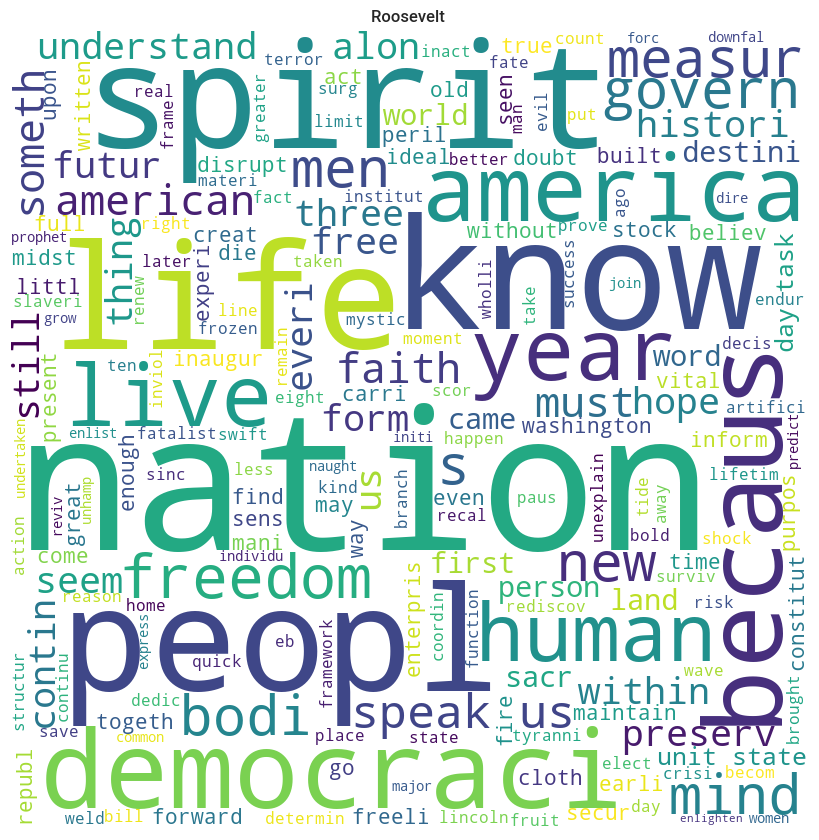

In [595]:

# Roosevelt
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(Rooseveltwordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.title("Roosevelt ")
  
plt.show() 

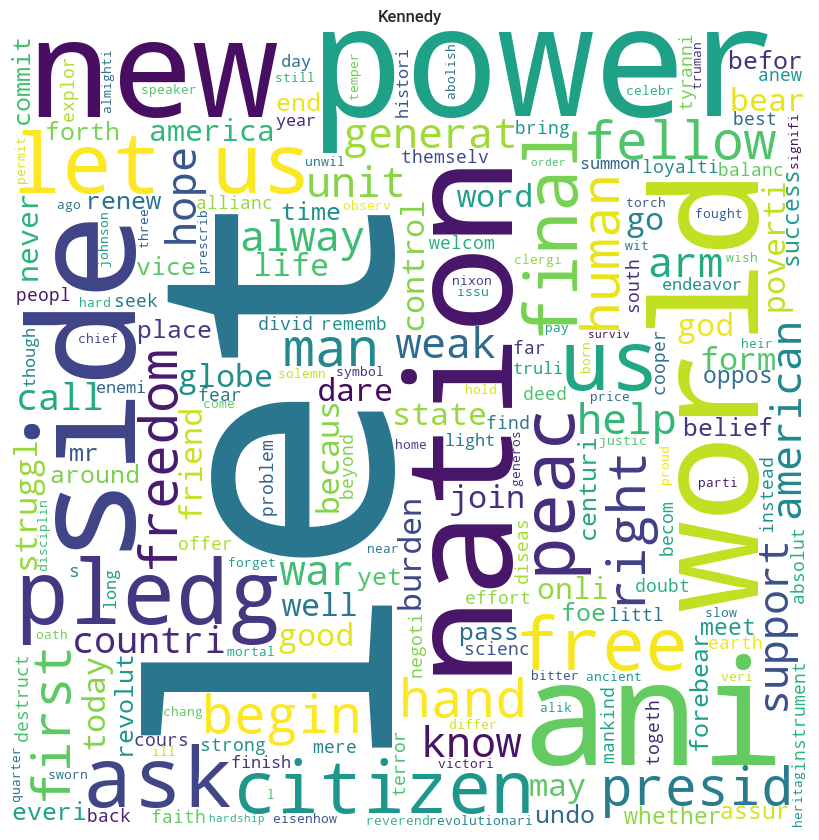

In [596]:

# Kennedy
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(Kennedywordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.title("Kennedy")
  
plt.show() 

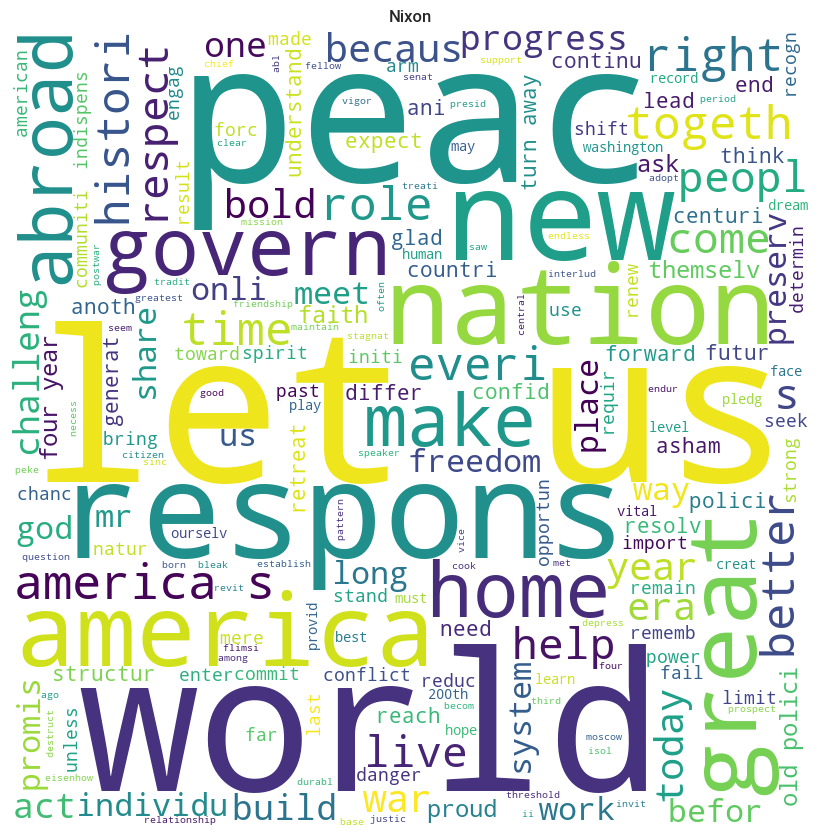

In [597]:

# Nixon
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(Nixonwordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.title("Nixon")
  
plt.show() 